In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
import pandas as pd
import random

categories = ['Electronics', 'Clothing', 'Groceries']
reasons = ['Damaged', 'Expired', 'Size Issue', 'Defective']

def generate_data(n):
    data = []
    for i in range(n):
        category = random.choice(categories)
        reason = random.choice(reasons)
        score = random.randint(1, 10)
        usage = random.randint(1, 60)
        value = {
            'Electronics': random.randint(5000, 50000),
            'Clothing': random.randint(500, 5000),
            'Groceries': random.randint(50, 500)
        }[category]
        
        # Unique Product Code (e.g., ELEC001, CLOT256, GROC499)
        prefix = {
            'Electronics': 'ELEC',
            'Clothing': 'CLOT',
            'Groceries': 'GROC'
        }[category]
        product_code = f"{prefix}{random.randint(100, 999)}"
        
        # Rule-based target decision
        if score >= 7 and reason == 'Size Issue':
            decision = 'Resell'
        elif score <= 4 or reason in ['Expired', 'Defective']:
            decision = 'Recycle'
        else:
            decision = 'Donate'
        
        data.append([
            product_code, category, reason, score, usage, value, decision
        ])
    
    return pd.DataFrame(data, columns=[
        'Product_Code', 'Product_Category', 'Return_Reason',
        'Condition_Score', 'Usage_Days', 'Product_Value', 'Decision'
    ])

# Generate the dataset and save
df = generate_data(500)
df.to_csv('product_returns.csv', index=False)
df.head()


PermissionError: [Errno 13] Permission denied: 'product_returns.csv'

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Product_Code      500 non-null    object
 1   Product_Category  500 non-null    object
 2   Return_Reason     500 non-null    object
 3   Condition_Score   500 non-null    int64 
 4   Usage_Days        500 non-null    int64 
 5   Product_Value     500 non-null    int64 
 6   Decision          500 non-null    object
dtypes: int64(3), object(4)
memory usage: 27.5+ KB


In [6]:
print(df['Product_Category'].value_counts())

Product_Category
Electronics    167
Clothing       167
Groceries      166
Name: count, dtype: int64


In [7]:
print(df['Decision'].value_counts())

Decision
Recycle    362
Donate      89
Resell      49
Name: count, dtype: int64


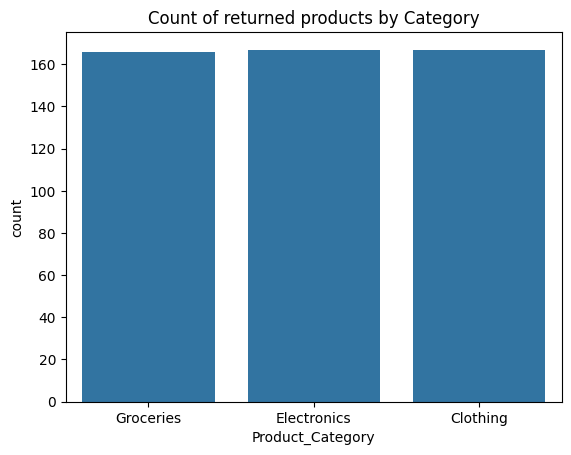

In [8]:
sns.countplot(data=df, x='Product_Category')
plt.title("Count of returned products by Category")
plt.show()

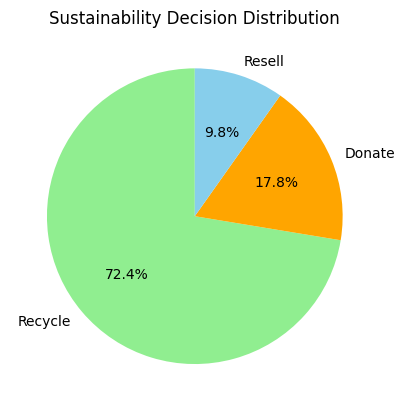

In [9]:
df['Decision'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=['lightgreen', 'orange', 'skyblue'])
plt.title('Sustainability Decision Distribution')
plt.ylabel('')
plt.show()


Text(0.5, 1.0, 'Condition Score distribution per decision')

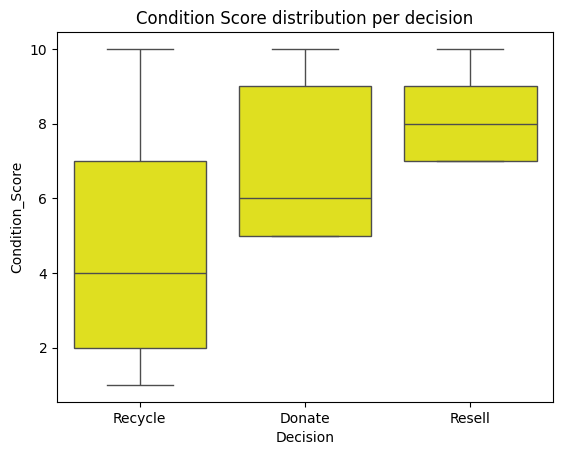

In [10]:
sns.boxplot(data=df, x='Decision', y='Condition_Score', color='yellow')
plt.title("Condition Score distribution per decision")

**Encoding the decision column**

In [11]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Decision_encoded'] = le.fit_transform(df['Decision'])


In [12]:
dict(zip(le.classes_, le.transform(le.classes_)))


{'Donate': np.int64(0), 'Recycle': np.int64(1), 'Resell': np.int64(2)}

**Encoding of categorical features**

In [13]:
df_encoded = pd.get_dummies(df, columns=['Product_Category', 'Return_Reason'], drop_first=True)


In [14]:
X = df_encoded.drop(['Decision', 'Decision_encoded'], axis=1)
y = df_encoded['Decision_encoded']


**Train-test Split**

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [17]:
print(df_encoded.head())


  Product_Code  Condition_Score  Usage_Days  Product_Value Decision  \
0      GROC334                7          49            360  Recycle   
1      ELEC466                4          46          21175  Recycle   
2      GROC395                6          54            280   Donate   
3      GROC733                6          23            452  Recycle   
4      GROC697                9          18            220  Recycle   

   Decision_encoded  Product_Category_Electronics  Product_Category_Groceries  \
0                 1                         False                        True   
1                 1                          True                       False   
2                 0                         False                        True   
3                 1                         False                        True   
4                 1                         False                        True   

   Return_Reason_Defective  Return_Reason_Expired  Return_Reason_Size Issue  
0       

In [22]:
non_numeric = X.select_dtypes(include=['object']).columns
print("Non-numeric columns:", non_numeric)


Non-numeric columns: Index(['Product_Code'], dtype='object')


In [33]:
print(df_encoded.columns)


Index(['Condition_Score', 'Usage_Days', 'Product_Value', 'Decision',
       'Decision_encoded', 'Product_Category_Electronics',
       'Product_Category_Groceries', 'Return_Reason_Defective',
       'Return_Reason_Expired', 'Return_Reason_Size Issue'],
      dtype='object')


In [43]:
from sklearn.model_selection import train_test_split

X = df_encoded.drop(['Decision', 'Decision_encoded'], axis=1)
y = df_encoded['Decision_encoded']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [44]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(X_train, y_train)


,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [51]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=42)


In [52]:
rf.fit(X_train, y_train)


,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [53]:
y_pred = model.predict(X_test)


RandomForestClassifier(random_state=42)
Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       1.00      1.00      1.00        73
           2       1.00      1.00      1.00         9

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100



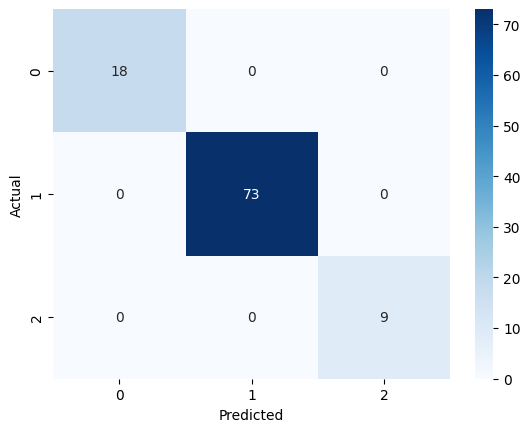

In [54]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

y_pred = rf.predict(X_test)
print(rf)  # should show RandomForestClassifier with n_estimators=100

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


***The Random Forest Classifier achieved 100% accuracy on the test set, indicating strong ability to learn return classification patterns from structured product metadata. This performance reflects the consistency of decision rules within our synthetic dataset, and validates the feasibility of return-type classification using condition score, usage, and product attributes***

C:\Users\Hp\AppData\Local\Temp\ipykernel_4092\4015384532.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=importance_df, x='Importance', y='Feature', palette='viridis')


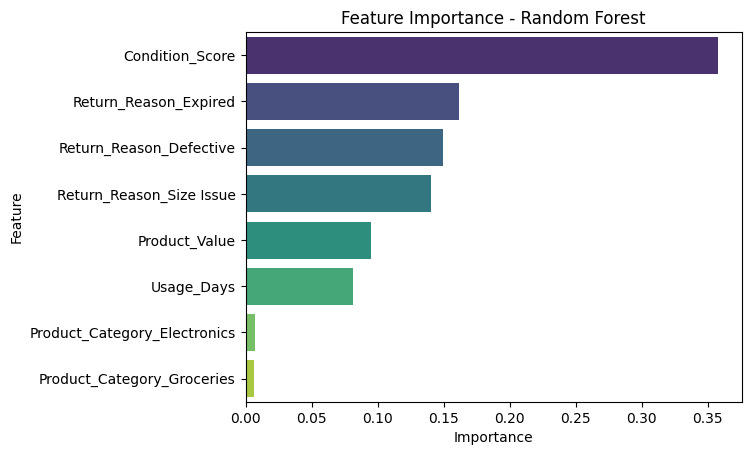

In [55]:
importances = rf.feature_importances_
features = X.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

sns.barplot(data=importance_df, x='Importance', y='Feature', palette='viridis')
plt.title("Feature Importance - Random Forest")
plt.show()


***The model identifies Condition_Score as the most influential factor for deciding return action, validating our initial assumptions.
Return reasons such as 'Expired' or 'Defective' are strong indicators for recycling, while 'Size Issue' drives resell decisions.
Product category plays a minimal role, implying that return outcomes are more strongly influenced by the product’s state than its type.***

In [56]:
!pip install streamlit


   ---------------------------------------- 0.0/10.1 MB ? eta -:--:--
   ------- -------------------------------- 1.8/10.1 MB 13.5 MB/s eta 0:00:01
   ---------------- ----------------------- 4.2/10.1 MB 12.9 MB/s eta 0:00:01
   --------------------- ------------------ 5.5/10.1 MB 9.6 MB/s eta 0:00:01
   ------------------------- -------------- 6.3/10.1 MB 8.5 MB/s eta 0:00:01
   ---------------------------- ----------- 7.1/10.1 MB 7.6 MB/s eta 0:00:01
   ------------------------------ --------- 7.6/10.1 MB 6.5 MB/s eta 0:00:01
   -------------------------------- ------- 8.1/10.1 MB 5.8 MB/s eta 0:00:01
   --------------------------------- ------ 8.4/10.1 MB 5.5 MB/s eta 0:00:01
   ----------------------------------- ---- 8.9/10.1 MB 5.0 MB/s eta 0:00:01
   ------------------------------------- -- 9.4/10.1 MB 4.7 MB/s eta 0:00:01
   ---------------------------------------  10.0/10.1 MB 4.4 MB/s eta 0:00:01
   ---------------------------------------- 10.1/10.1 MB 4.2 MB/s eta 0:00:00
  


[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [57]:
import streamlit as st

st.title("LoopCart Return Decision Predictor")

2025-06-20 13:47:14.090 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-20 13:47:14.433 
  command:

    streamlit run C:\Users\Hp\AppData\Local\Programs\Python\Python313\Lib\site-packages\ipykernel_launcher.py [ARGUMENTS]
2025-06-20 13:47:14.435 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-20 13:47:14.438 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


DeltaGenerator()

In [59]:
run C:\Users\Hp\AppData\Local\Programs\Python\Python313\Lib\site-packages\ipykernel_launcher.py

AssertionError: init_sockets cannot be called twice!